# PROJET SCORING

Groupe 2: ERNEST DAVE AOUNANG, NARIMANE TAHIR, NEOLINE TAKIDO

Après avoir récemment intégré l'équipe, nous avens été chargé de développer un modèle de crédit scoring à partir des données mises à disposition par l'entreprise. L'objectif est de concevoir, entraîner, et mettre en production un modèle robuste capable de prédire la solvabilité des clients. La première étape consiste à se familiariser avec l'ensemble des données disponibles pour comprendre leur structure, leur qualité et leur pertinence pour le modèle.


## IMPORTATION DES PACKAGES

In [2]:
#traitement
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
#from imblearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC
from sklearn.feature_selection import VarianceThreshold
# from hyperopt import fmin, tpe, hp, Trials
# from hyperopt.pyll.base import scope

# Ignore les warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

#métriques
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,roc_curve, f1_score,auc
 
# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
#modèles
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
 

## PROBLEMATIQUE

Dans le cadre du développement d'un modèle de credit scoring pour évaluer la solvabilité des clients, il est essentiel de se familiariser avec un jeu de données varié, incluant des données comportementales. L'objectif est de concevoir un modèle efficace capable de prédire la probabilité de défaut de paiement, afin de permettre aux banques de prendre des décisions éclairées sur l'octroi de crédit et la gestion des risques.

## EDA (Exploratory Data Analysis) & PREPROCESSING

In [6]:
#charger les données d'entraînement et de test pour les préparer à l'analyse
data = pd.read_csv('application_train.csv')

In [7]:
data_test = pd.read_csv('application_test.csv')

In [8]:
# Aperçu des données d'entraînement
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Aperçu des données de test
data_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# dimensions
data.shape

(307511, 122)

In [16]:
# dimensions
data_test.shape

(48744, 121)

Nous avons **307511** individus décris par **122** variables pour les données d'entraînement et **48744** individus décris par **121** variables pour les données de test. Nous allons maitenant déterminer le pourcentage de données manquantes pour chaque colonne et en fonction des cas nous allons les traiter ou les supprimer.

In [20]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Le Dataframe contient " + str(df.shape[1]) + " colonnes.\n"      
            "Il y a " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes avec des données manquantes.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [522]:
missing_values_table(data)

Le Dataframe contient 122 colonnes.
Il y a 67 colonnes avec des données manquantes.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [22]:
var = missing_values_table(data)

Le Dataframe contient 122 colonnes.
Il y a 67 colonnes avec des données manquantes.


In [26]:
#déterminer les colonnes avec plus de 50% de données manquantes
set = var[var['% of Total Values']>50]

In [28]:
#supprimer les colonnes avec plus de 50% de données manquantes
data2 = data.drop(columns= set.index)
data_test2=data_test.drop(columns= set.index)

In [30]:
data2.shape

(307511, 81)

In [32]:
#vérifier qu'il n'y a pas de doublons
data2[data2.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [316]:
# Imputer les valeurs manquantes
# Pour les variables numériques remplacer par moyenne/médiane

In [34]:
num_features = data2.select_dtypes(include=['int64', 'float64']).columns
for col in num_features:
    # Calculer la moyenne
    mean_value = data2[col].mean()
   
 
    # Remplacer les NaN par la moyenne
    data2[col]= data2[col].fillna(mean_value)
    if col != "TARGET":
        mean_value2 = data_test2[col].mean()
        data_test2[col]= data_test2[col].fillna(mean_value2)

In [36]:
# Pour les variables catégorielles remplacer par le mode 
cat_features = data2.select_dtypes(include=['object']).columns
for col in cat_features:
    data2[col].replace('XNA', np.nan, inplace=True)
    data_test2[col].replace('XNA', np.nan, inplace=True)
    # Calculer le mode
    mode_value = data2[col].mode()[0]
   
     
    # Remplacer les NaN par le mode
    data2[col]= data2[col].fillna(mode_value)
    if col != "TARGET":
        mode_value2 = data_test2[col].mode()[0]
        data_test2[col]= data_test2[col].fillna(mode_value2)

In [38]:
# Aperçu des données
data2.isnull().sum().sum()

0

In [40]:
data_test2.isnull().sum().sum()

0

In [48]:
data2[cat_features].value_counts()

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  NAME_TYPE_SUITE  NAME_INCOME_TYPE      NAME_EDUCATION_TYPE            NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  OCCUPATION_TYPE  WEEKDAY_APPR_PROCESS_START  ORGANIZATION_TYPE       EMERGENCYSTATE_MODE
Cash loans          F            N             Y                Unaccompanied    Pensioner             Secondary / secondary special  Married               House / apartment  Laborers         TUESDAY                     Business Entity Type 3  No                     1676
                                                                                                                                                                                                WEDNESDAY                   Business Entity Type 3  No                     1618
                                                                                                                                                                                                

In [50]:
data2.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             57
EMERGENCYSTATE_MODE            2
dtype: int64

In [323]:
columns_to_drop = [f'FLAG_DOCUMENT_{i}' for i in range(2, 22)] # Suppression des colonnes
data_test2_cleaned = data_test2.drop(columns=columns_to_drop, errors='ignore')
columns_to_drop.append("SK_ID_CURR")
data2_cleaned = data2.drop(columns=columns_to_drop, errors='ignore')

In [324]:
col_num=data2_cleaned.select_dtypes(include=['int64', 'float64']).columns

In [325]:
# Appliquez un seuil de variance (par exemple, 0.01)
selector = VarianceThreshold(threshold=0.01)

# Appliquez le sélecteur pour supprimer les colonnes à faible variance
df_reduced = selector.fit_transform(data2_cleaned[col_num])

# Pour conserver le DataFrame avec les noms des colonnes d'origine
df_reduced = pd.DataFrame(df_reduced, columns=data2_cleaned[col_num].columns[selector.get_support()])

# Affichez les colonnes conservées
print(df_reduced.columns)

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


<Axes: >

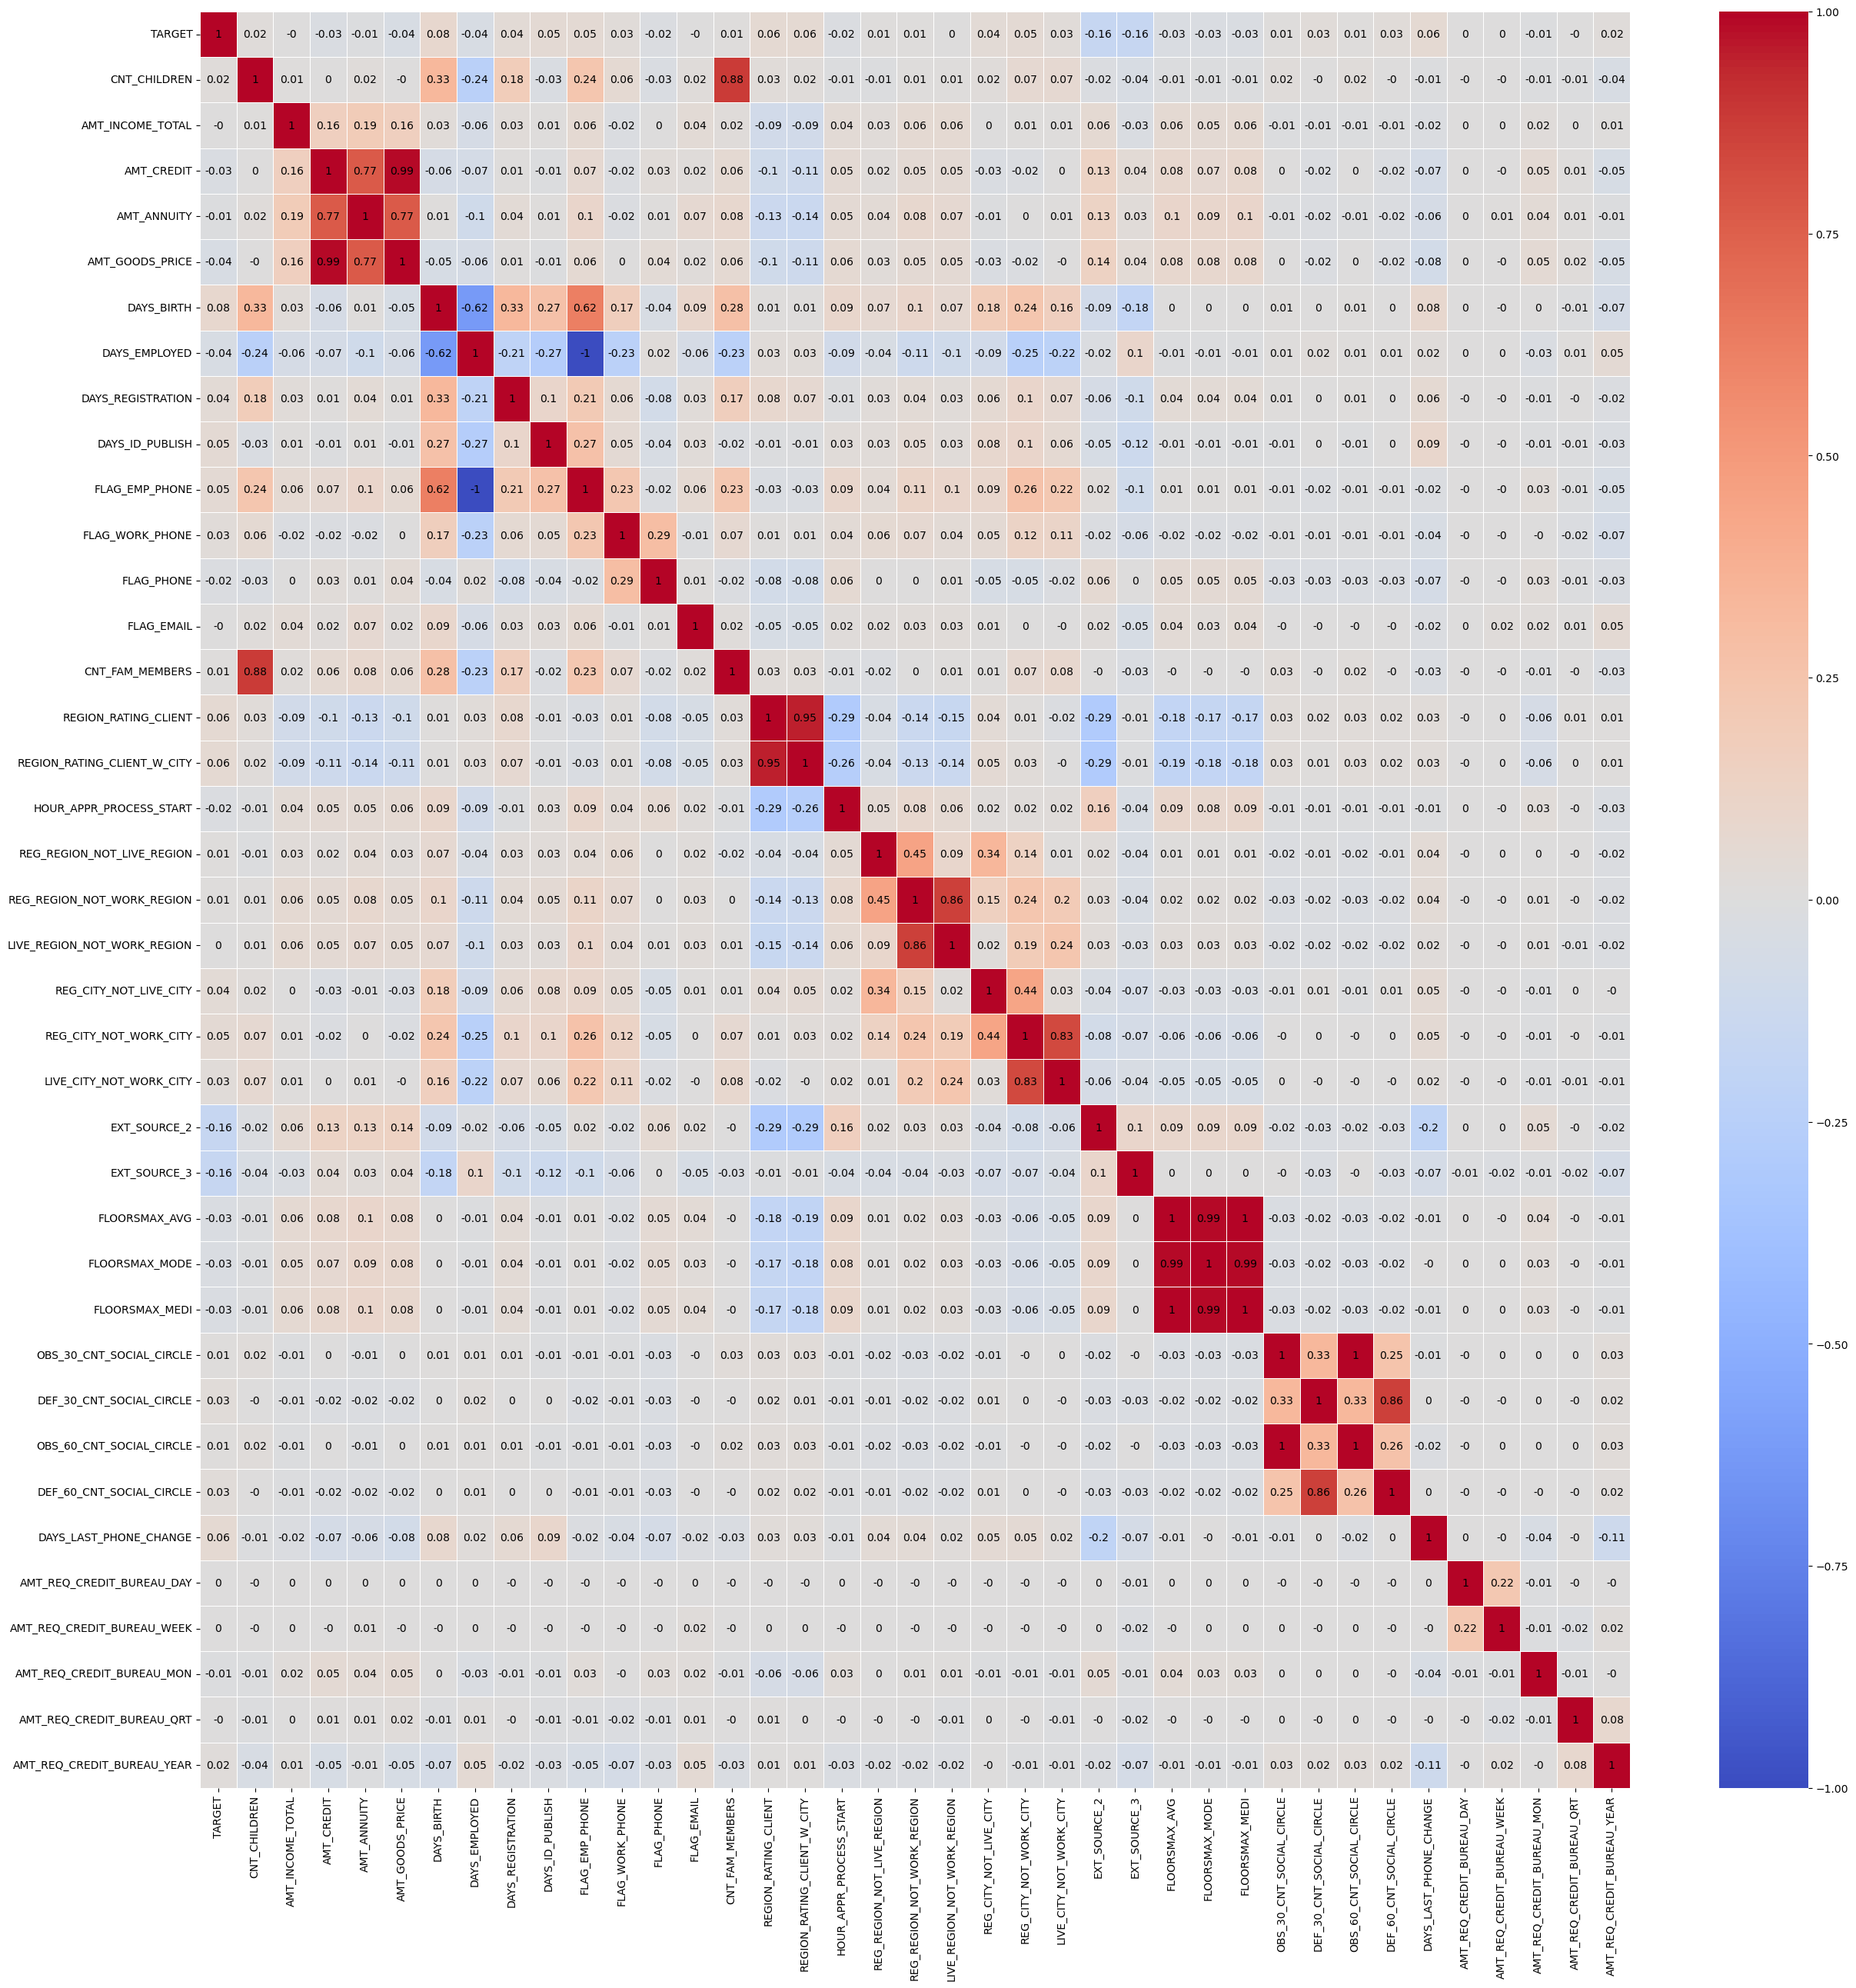

In [327]:
plt.figure(figsize = (30,30))
corr = np.round(df_reduced.corr(),2)
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=.5, annot_kws={"color":"black"})

La matrice de corrélation nous permet de constater qu'il n'y a pas de variable fortement corrélée avec le target. Mais nous remarquons des variables fortement corrélées entre elles, nous allons donc les supprimer.

In [328]:
columns_to_drop = ["FLAG_EMAIL","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","CNT_FAM_MEMBERS", "AMT_GOODS_PRICE", "AMT_ANNUITY", "REGION_RATING_CLIENT_W_CITY","LIVE_REGION_NOT_WORK_REGION", "FLOORSMAX_AVG", "FLOORSMAX_MEDI", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"] # Suppression des colonnes

df_reduced= df_reduced.drop(columns=columns_to_drop, errors='ignore')

In [329]:
col2 = df_reduced.columns
col2=list(col2)
for col in cat_features:
    col2.append(col)
col2

['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLOORSMAX_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

In [572]:
data2 = data2[col2]

In [331]:
ex = "TARGET"
c2 = [col for col in col2 if col != ex]

In [332]:
data_test2=data_test2[c2]

In [574]:
#sauvegarde du dataset
data2.to_csv("data_final.csv")

In [575]:
#sauvegarde du dataset
data_test2.to_csv("data_test.csv")

## STATISTIQUE DESCRIPTIVE

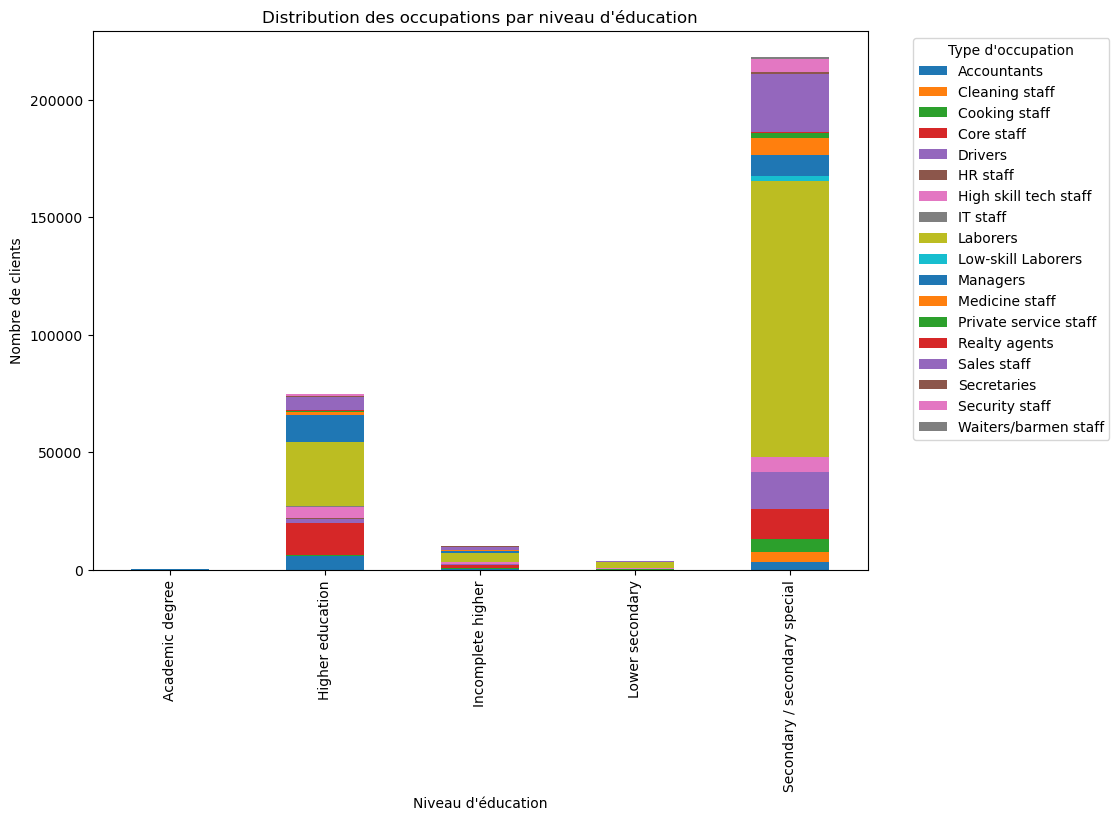

In [620]:
#destribution des occupations par niveau d'éducation 
education_occupation = pd.crosstab(data2['NAME_EDUCATION_TYPE'], data2['OCCUPATION_TYPE'])
education_occupation.plot(kind='bar', stacked=True, figsize=(10, 7))

# Ajoute les étiquettes et le titre
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Nombre de clients')
plt.title('Distribution des occupations par niveau d\'éducation')
plt.legend(title='Type d\'occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affiche le graphique
plt.show()

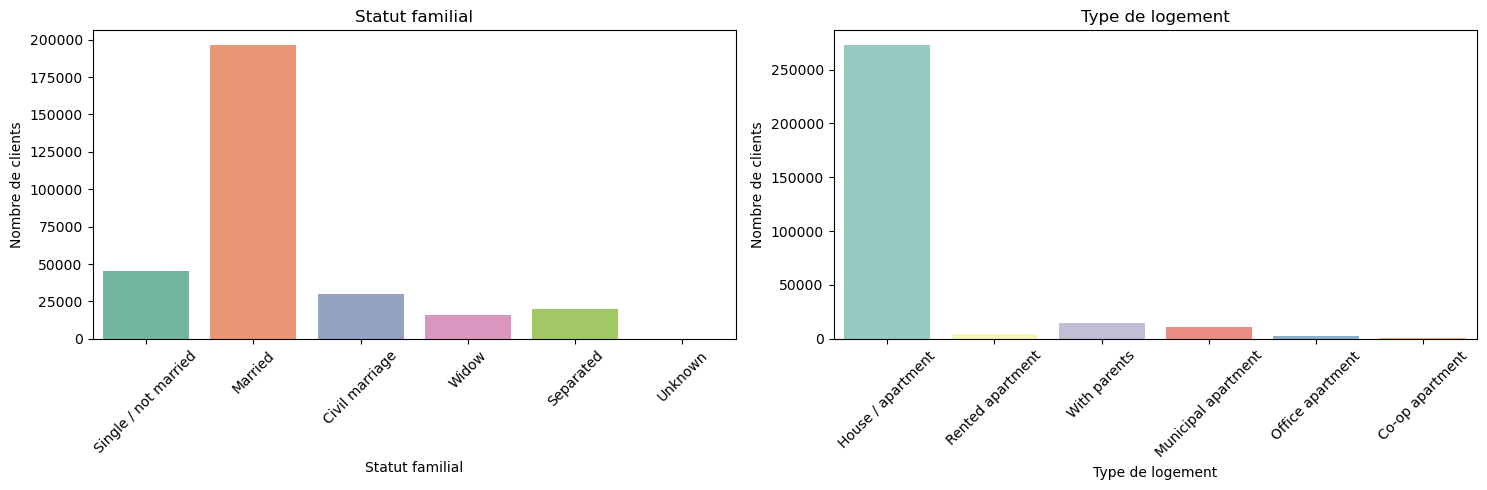

,CODE_GENDER,TARGET
count,307511,307511.000000
unique,2,NaN
top,F,NaN
freq,202452,NaN
mean,NaN,0.080729
std,NaN,0.272419
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,0.000000


In [618]:
# Définir la taille de la figure
plt.figure(figsize=(15, 5))

# Premier subplot : Distribution de NAME_FAMILY_STATUS
plt.subplot(1, 2, 1)
sns.countplot(x='NAME_FAMILY_STATUS', data=data2, palette='Set2')
plt.title('Statut familial')
plt.xlabel('Statut familial')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=45)

# Deuxième subplot : Distribution de NAME_HOUSING_TYPE
plt.subplot(1, 2, 2)
sns.countplot(x='NAME_HOUSING_TYPE', data=data2, palette='Set3')
plt.title('Type de logement')
plt.xlabel('Type de logement')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=45)

# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher les graphiques
plt.show()
data2[["CODE_GENDER","TARGET"]].describe(include="all")

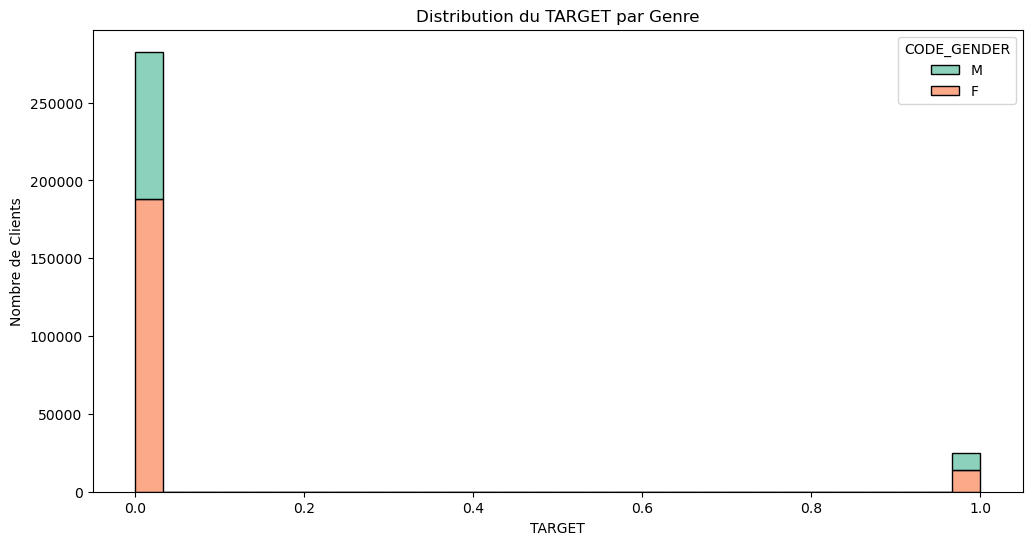

In [616]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data2, x='TARGET', hue='CODE_GENDER', multiple='stack', palette='Set2', bins=30)
plt.title('Distribution du TARGET par Genre')
plt.xlabel('TARGET')
plt.ylabel('Nombre de Clients')
plt.show()

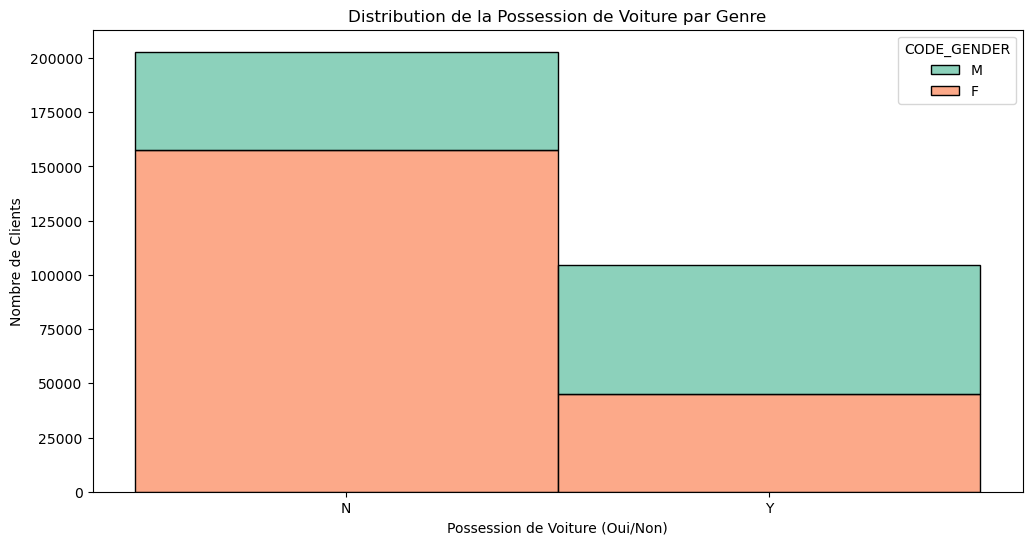

In [614]:
# Créer un histogramme de la distribution de la possession de voiture par genre
plt.figure(figsize=(12, 6))
sns.histplot(data=data2, x='FLAG_OWN_CAR', hue='CODE_GENDER', multiple='stack', palette='Set2', discrete=True)
plt.title('Distribution de la Possession de Voiture par Genre')
plt.xlabel('Possession de Voiture (Oui/Non)')
plt.ylabel('Nombre de Clients')
plt.show()

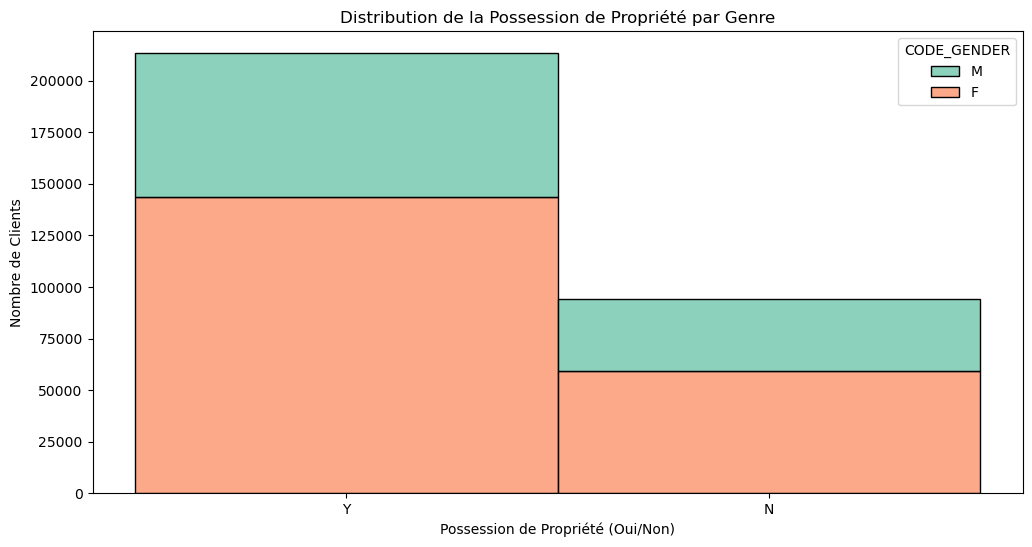

In [612]:
# Créer un histogramme de la distribution de la possession de propriété par genre
plt.figure(figsize=(12, 6))
sns.histplot(
    data=data2, 
    x='FLAG_OWN_REALTY', 
    hue='CODE_GENDER', 
    multiple='stack', 
    palette='Set2', 
    discrete=True, 
    bins=2
)
plt.title('Distribution de la Possession de Propriété par Genre')
plt.xlabel('Possession de Propriété (Oui/Non)')
plt.ylabel('Nombre de Clients')
plt.show()

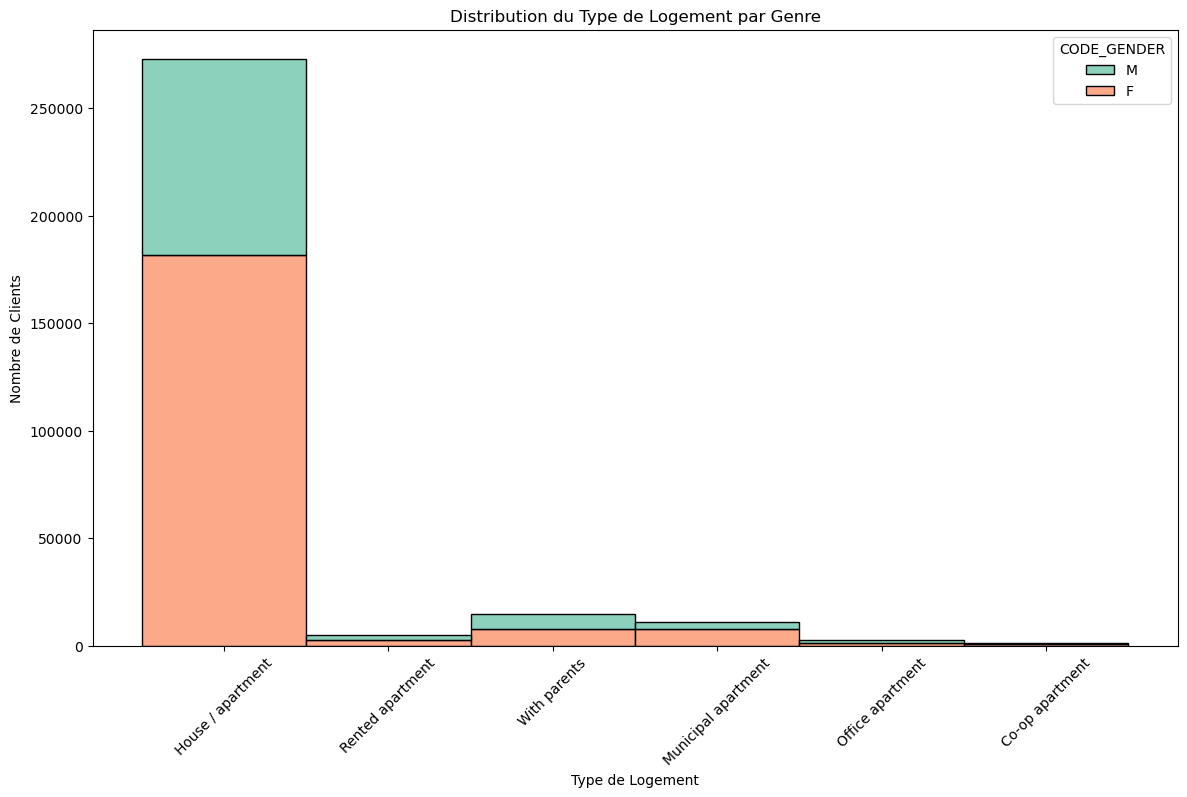

In [610]:
plt.figure(figsize=(14, 8))
sns.histplot(
    data=data2, 
    x='NAME_HOUSING_TYPE', 
    hue='CODE_GENDER', 
    multiple='stack', 
    palette='Set2', 
    discrete=True
)
plt.title('Distribution du Type de Logement par Genre')
plt.xlabel('Type de Logement')
plt.ylabel('Nombre de Clients')
plt.xticks(rotation=45)  # Pour améliorer la lisibilité des labels
plt.show()

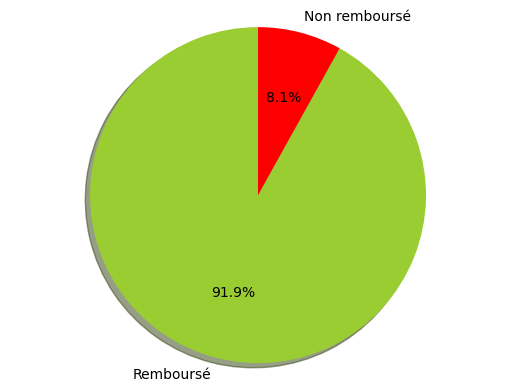

In [336]:
var_int = list(data2["TARGET"])
leave = var_int.count(1)
stay = var_int.count(0)

labels = "Remboursé", "Non remboursé", 
sizes = [stay, leave ]
colors = ["yellowgreen", "red"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

Nous constatons que le jeu de données d'entrainement est déséquilibré, nous allons donc utiliser le SMOTENC. C'est une méthode pour équilibrer les classes en générant des exemples synthétiques pour les classes minoritaires, en tenant compte des variables catégorielles.

## MODELE

In [337]:
# Séparer les caractéristiques (features) et la variable cible
X_train = data2.drop(columns=['TARGET'])  
y_train = data2['TARGET']

# Identifier les colonnes numériques et catégorielles
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

In [339]:
#normaliser les vriables numériques
sc= StandardScaler()
X_train[num_features]=sc.fit_transform(X_train[num_features])
data_test2[col_num] = sc.fit_transform(data_test2[col_num])

In [340]:
# Index des colonnes catégorielles (nécessaire pour SMOTENC)
cat_indices = [X_train.columns.get_loc(col) for col in cat_features]

In [341]:
# Convertir une variable continue en une variable binaire
y_train_binarized = pd.cut(y_train, bins=2, labels=[0, 1])

In [343]:
# Appliquer SMOTENC pour rééquilibrer les données
smote_nc = SMOTENC(categorical_features=cat_indices, random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train_binarized)

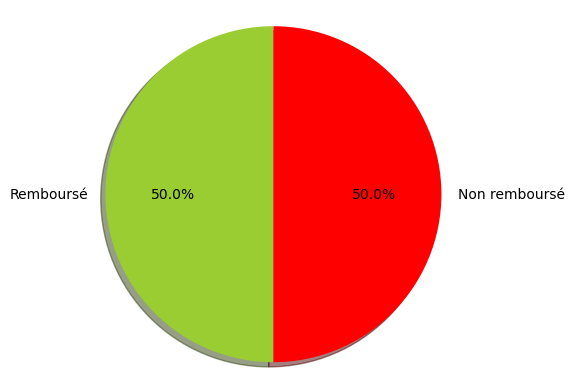

In [344]:
var_int = list(y_train_resampled)
leave = var_int.count(1)
stay = var_int.count(0)

labels = "Remboursé", "Non remboursé", 
sizes = [stay, leave ]
colors = ["yellowgreen", "red"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [345]:
X_train_resampled

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,...,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,-0.577538,0.142129,-0.478095,1.506880,-0.456215,0.379837,0.579154,0.468697,-0.499013,1.599337,...,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No
1,-0.577538,0.426792,1.725450,-0.166821,-0.460115,1.078697,1.790855,0.468697,-0.499013,1.599337,...,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,No
2,-0.577538,-0.427196,-1.152888,-0.689509,-0.453299,0.206116,0.306869,0.468697,2.003956,1.599337,...,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,No
3,-0.577538,-0.142533,-0.711430,-0.680114,-0.473217,-1.375829,0.369143,0.468697,-0.499013,-0.625259,...,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No
4,-0.577538,-0.199466,-0.213734,-0.892535,-0.473210,0.191639,-0.307263,0.468697,-0.499013,-0.625259,...,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565367,-0.577538,-0.094306,-0.578778,1.761400,-0.457848,0.650037,1.304694,0.468697,-0.499013,-0.625259,...,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Military,No
565368,-0.577538,-0.080571,0.164012,1.280905,-0.460454,1.160232,0.322164,0.468697,2.003956,-0.625259,...,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,MONDAY,Self-employed,No
565369,2.192084,-0.367974,-0.214549,1.226320,-0.459012,0.865731,0.043653,0.468697,-0.499013,1.599337,...,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,TUESDAY,Trade: type 7,No
565370,-0.577538,-0.076785,-0.682744,1.218894,-0.454041,0.259558,0.263598,0.468697,-0.499013,-0.625259,...,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Drivers,TUESDAY,Business Entity Type 3,No


In [346]:
#encoder les données catégorielles
labelencoder = LabelEncoder()
mappings_df =  pd.DataFrame()

for col in cat_features:
    X_train_resampled[col]=labelencoder.fit_transform(X_train_resampled[col])
    data_test2[col]=labelencoder.fit_transform(data_test2[col])
    # Créer un DataFrame pour le mapping de cette colonne
    mapping_df = pd.DataFrame({
        "Encoded": labelencoder.transform(labelencoder.classes_),
        col: labelencoder.classes_
    })
    mapping_df.set_index("Encoded", inplace=True)
    # Ajouter les mappings au DataFrame principal
    mappings_df = pd.concat([mappings_df, mapping_df], axis=1)

In [347]:
mappings_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
Encoded,,,,,,,,,,,,,
0,Cash loans,F,N,N,Children,Businessman,Academic degree,Civil marriage,Co-op apartment,Accountants,FRIDAY,Advertising,No
1,Revolving loans,M,Y,Y,Family,Commercial associate,Higher education,Married,House / apartment,Cleaning staff,MONDAY,Agriculture,Yes
2,NaN,NaN,NaN,NaN,Group of people,Pensioner,Incomplete higher,Separated,Municipal apartment,Cooking staff,SATURDAY,Bank,NaN
3,NaN,NaN,NaN,NaN,Other_A,State servant,Lower secondary,Single / not married,Office apartment,Core staff,SUNDAY,Business Entity Type 1,NaN
4,NaN,NaN,NaN,NaN,Other_B,Student,Secondary / secondary special,Widow,Rented apartment,Drivers,THURSDAY,Business Entity Type 2,NaN
5,NaN,NaN,NaN,NaN,"Spouse, partner",Unemployed,NaN,NaN,With parents,HR staff,TUESDAY,Business Entity Type 3,NaN
6,NaN,NaN,NaN,NaN,Unaccompanied,Working,NaN,NaN,NaN,High skill tech staff,WEDNESDAY,Cleaning,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT staff,NaN,Construction,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,Culture,NaN


In [356]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_resampled,y_train_resampled,test_size=0.2, stratify=y_train_resampled, random_state=42)

## Métrique
Évaluation de la performance du classifieur pour le modèle de credit scoring
Lors de la mise en place d'un modèle de credit scoring, il est essentiel d'évaluer la performance des classifieurs utilisés. La variable d'intérêt dans ce contexte indique si un client est à risque de défaut de paiement ou non. Les résultats prédits par le modèle peuvent parfois ne pas correspondre à la réalité. Il existe quatre résultats possibles :

    * Vrai Positif (VP) : Le client est effectivement en défaut de paiement, et le modèle a correctement prédit ce risque.
    * Faux Négatif (FN) : Le client est en défaut de paiement, mais le modèle a échoué à le prédire.
    * Faux Positif (FP) : Le client n'est pas en défaut de paiement, mais le modèle a incorrectement prédit qu'il l'était.
    * Vrai Négatif (VN) : Le client n'est pas en défaut de paiement, et le modèle a correctement prédit qu'il ne l'était pas.
Ces quatre résultats peuvent être représentés sous forme de matrice de confusion, qui permet d'analyser la performance du modèle.

Pour évaluer la performance d'un classifieur binaire, plusieurs métriques sont utilisées :

    * Accuracy (ACC) = (VP + VN) / (VP + VN + FP + FN) : Mesure la proportion de prédictions correctes parmi l'ensemble des prédictions.
    * Précision (PPV) = VP / (VP + FP) : Indique la proportion de vrais positifs parmi les prédictions positives du modèle.
    * Sensibilité (SEN ou Recall) = VP / (VP + FN) : Mesure la capacité du modèle à identifier correctement les clients en défaut de paiement.
    * AUC (Area Under the ROC Curve) :  L'AUC évalue la capacité d'un classifieur à distinguer entre les classes positives et négatives. La courbe ROC trace le taux de vrais positifs (sensibilité) contre le taux de faux positifs (1 - spécificité) pour différents seuils de classification.
    * F1 Score : Moyenne pondérée de la précision et de la sensibilité, utile en cas de données déséquilibrées.

In [490]:
def viz_confusion_matrix(Y_test, Y_pred):
    confmat = confusion_matrix(Y_test, Y_pred, normalize='true')
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(confmat, annot=True, ax=ax)
    plt.show()

In [422]:
def eval_perf(classifier, X_test, Y_test):
    Y_pred = classifier.predict(X_test)
    tfp, tvp, _ = roc_curve(Y_test.values, classifier.predict_proba(X_test)[:,1])
    dict_out = {
        "Precision" : precision_score(Y_test, Y_pred).round(3),
        "F1 Score" : f1_score(Y_test, Y_pred).round(3),
        "Accuracy" : accuracy_score(Y_test, Y_pred),
        'AUC': auc(tfp, tvp).round(3),
        'RECALL SCORE':recall_score(Y_test, Y_pred).round(3)
    }
    print("Métrique :", dict_out)

In [430]:
def viz_roc_curve(classifier, name, X_test, Y_pred):
    tfp, tvp, _ = roc_curve(y_valid.values, classifier.predict_proba(X_test)[:,1])
    auc_val = auc(tfp, tvp)
    fig, ax = plt.subplots(figsize=(8, 7))
    plt.title('Courbe ROC - ' + name)
    plt.plot(tfp, tvp)
    plt.plot([0, 1], ls = "--")
    plt.plot([0, 0], [1, 0] , c = ".7"), plt.plot([1, 1] , c = ".7")
    plt.ylabel("Taux de Vrai Positif")
    plt.xlabel("Taux de Faux Positif")
    plt.show()

In [368]:
X_train.shape

(452297, 38)

In [370]:
X_valid.shape

(113075, 38)

# RFE LOG REG

L'élimination récursive des fonctionnalités (RFE) est basée sur l'idée de construire un modèle à plusieurs reprises et de choisir la fonctionnalité la plus performante ou la moins performante, en mettant la fonctionnalité de côté, puis en répétant le processus avec le reste des fonctionnalités. Ce processus est appliqué jusqu'à ce que toutes les fonctionnalités de l'ensemble de données soient épuisées. L'objectif de RFE est de sélectionner des fonctionnalités en considérant de manière récursive des ensembles de fonctionnalités de plus en plus petits.

In [448]:
from sklearn.feature_selection import RFE
LogReg = LogisticRegression(max_iter=1000)
#Sélection des meilleures variables 
rfe = RFE(LogReg, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

#Sommaire des variables sélectionnées
print(rfe.support_)
print(rfe.ranking_)

# Train set avec sélection de variables
X_train_selectedvar = X_train_resampled.columns[rfe.support_]
X_train_selectedvar

C:\Users\ernes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ernes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[ True  True False  True  True False False  True False False False False
 False False  True False False  True  True False False False  True False
 False  True  True  True  True  True  True  True  True  True False False
 False  True]
[ 1  1 19  1  1  6  3  1 15  2  8  7 17 20  1 14 11  1  1 18  4  5  1  9
 10  1  1  1  1  1  1  1  1  1 13 12 16  1]


Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [446]:
# Modèle de régression logistique
lr = LogisticRegression(random_state=42, max_iter=500)

# Définir la grille de paramètres
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grille = grid_search.fit(X_train[X_train_selectedvar], y_train)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres: ", grid_search.best_params_)

Meilleurs paramètres:  {'C': 1}


In [449]:
lr = LogisticRegression(C=1, random_state=42, max_iter=500)

In [450]:
lr.fit(X_train[X_train_selectedvar], y_train)

LogisticRegression(C=1, max_iter=500, random_state=42)

In [451]:
y_pred_lr = lr.predict(X_valid[X_train_selectedvar])

In [588]:
y_pred_lr_test = lr.predict(data_test2[X_train_selectedvar])

In [590]:
y_pred_lr_test 

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [452]:
eval_perf(lr, X_valid[X_train_selectedvar], y_valid)

Métrique : {'Precision': 0.747, 'F1 Score': 0.764, 'Accuracy': 0.7581693566217113, 'AUC': 0.835, 'RECALL SCORE': 0.781}


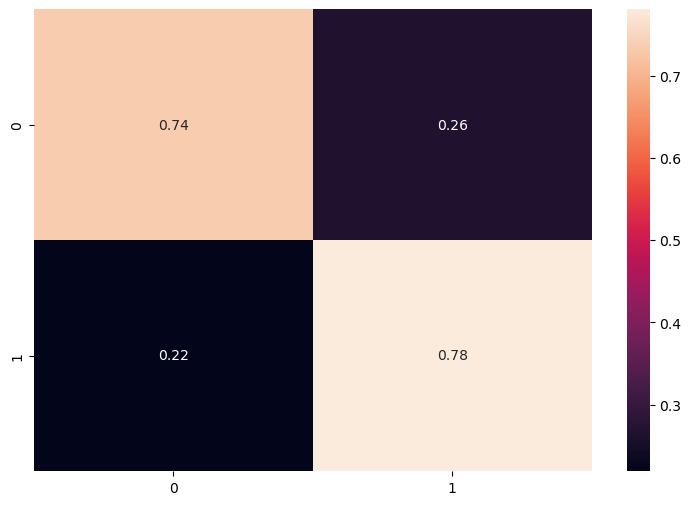

In [492]:
viz_confusion_matrix(y_valid, y_pred_lr)

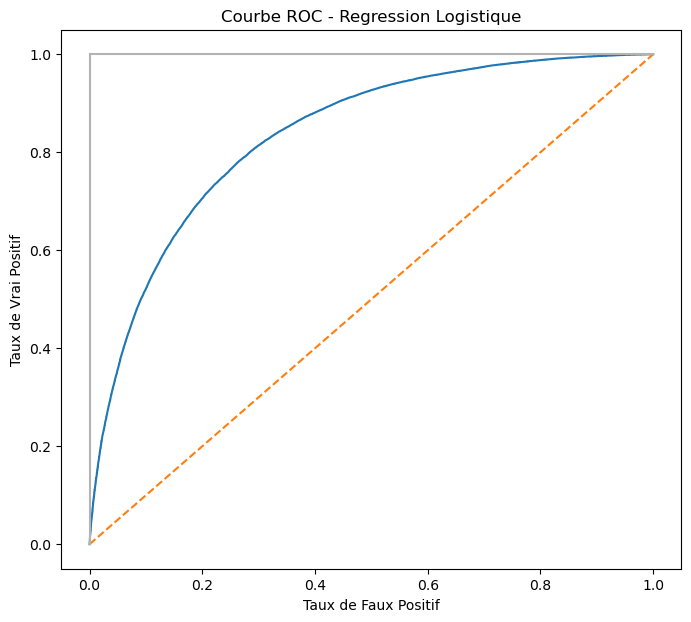

In [462]:
name="Regression Logistique"
viz_roc_curve(lr, name, X_valid[X_train_selectedvar], y_pred_lr)

# KNN

paramètre:
   * n_neighbors : nombre de voisins

In [473]:
knn = KNeighborsClassifier()

In [477]:
# # Définir la grille de paramètres
# param_grid = {
#     'n_neighbors' : [1,3,5,7,9,11,13], 
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }

# # Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
# grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grille = grid_search.fit(X_train[X_train_selectedvar], y_train)

# # Meilleurs paramètres trouvés
# print("Meilleurs paramètres: ", grid_search.best_params_)

In [479]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [481]:
knn.fit(X_train[X_train_selectedvar], y_train)

KNeighborsClassifier(n_jobs=-1)

In [483]:
y_pred_knn = lr.predict(X_valid[X_train_selectedvar])

In [485]:
eval_perf(knn, X_valid[X_train_selectedvar], y_valid)

Métrique : {'Precision': 0.775, 'F1 Score': 0.825, 'Accuracy': 0.8127525978332965, 'AUC': 0.88, 'RECALL SCORE': 0.882}


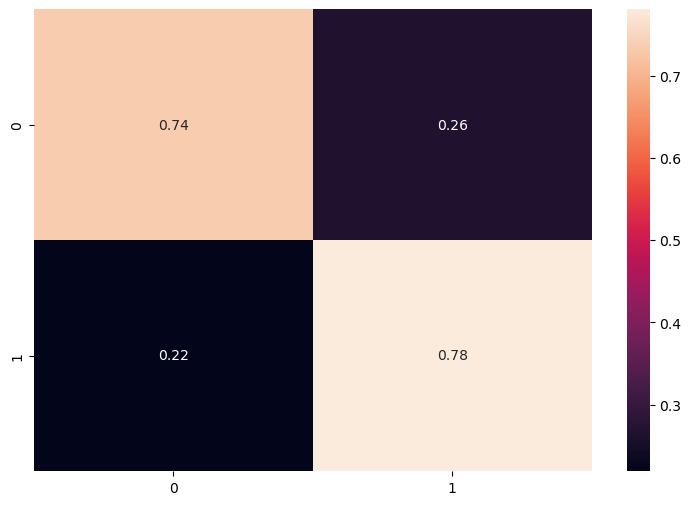

In [496]:
viz_confusion_matrix(y_valid, y_pred_knn)

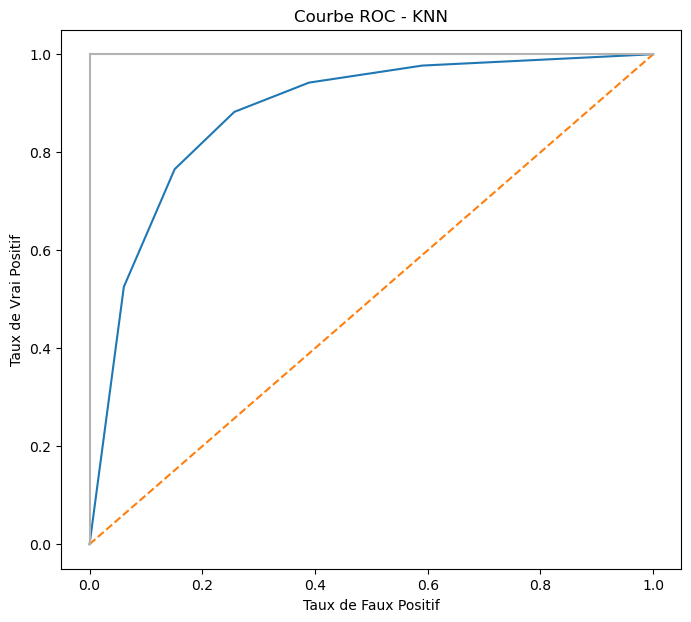

In [516]:
viz_roc_curve(knn, "KNN", X_valid[X_train_selectedvar], y_pred_knn)

# RANDOM FOREST

paramètres:
   * n_estimators : nombre d'arbres
   * max_features : le nombre maximal de variables considérées pour découper un noeud
   * max_depth : la profondeur de l'arbre
   * min_samples_split : le nombre minimal de points placés dans un noeud avant de le découper

In [559]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, max_features=15, n_jobs=-1)

In [561]:
rf.fit(X_train[X_train_selectedvar], y_train)

RandomForestClassifier(max_depth=10, max_features=15, min_samples_split=5,
                       n_jobs=-1)

In [562]:
y_pred_rf = rf.predict(X_valid[X_train_selectedvar])

In [ ]:
y_pred_rf_test = rf.predict(data_test2[X_train_selectedvar])

In [563]:
eval_perf(rf, X_valid[X_train_selectedvar], y_valid)

Métrique : {'Precision': 0.757, 'F1 Score': 0.785, 'Accuracy': 0.7765553835949591, 'AUC': 0.854, 'RECALL SCORE': 0.815}


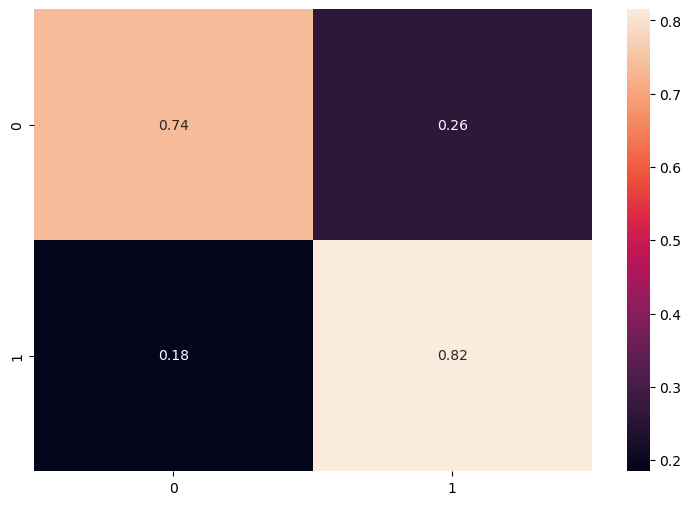

In [564]:
viz_confusion_matrix(y_valid, y_pred_rf)

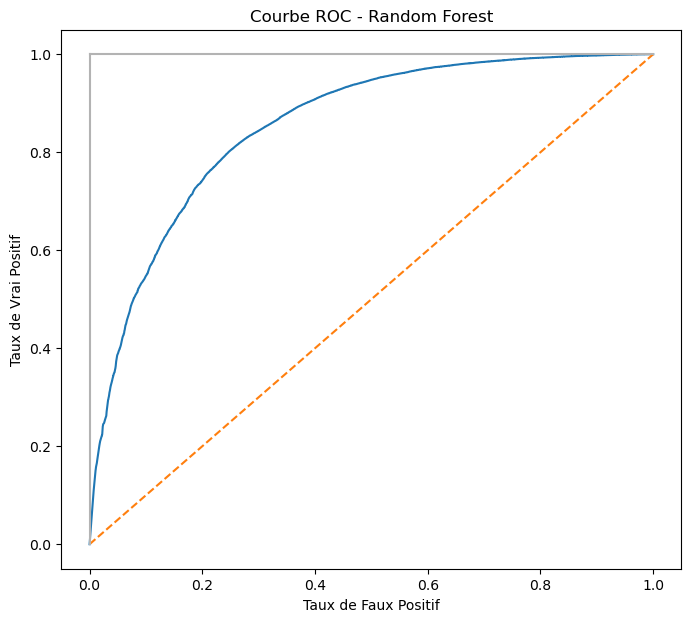

In [566]:
viz_roc_curve(rf, "Random Forest", X_valid[X_train_selectedvar], y_pred_rf)

In [600]:
y_pred_knn_test = knn.predict(data_test2[X_train_selectedvar])

In [602]:
data_test2["TARGET"]=y_pred_knn_test
data_test2.to_csv("target_knn.csv")

In [604]:
data_test2

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,...,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,TARGET
0,0,135000.0,568800.0,-19241,-2329,-5170.0,-812,1,0,0,...,6,6,1,1,1,8,5,28,0,1
1,0,99000.0,222768.0,-18064,-4469,-9118.0,-1623,1,0,0,...,6,6,4,1,1,9,0,42,0,1
2,0,202500.0,663264.0,-20038,-4458,-2175.0,-3503,1,0,0,...,6,6,1,1,1,4,1,54,0,1
3,2,315000.0,1575000.0,-13976,-1866,-2000.0,-4208,1,0,1,...,6,6,4,1,1,14,6,5,0,1
4,1,180000.0,625500.0,-13040,-2191,-4000.0,-4262,1,1,0,...,6,6,4,1,1,8,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,121500.0,412560.0,-19970,-5169,-9094.0,-3399,1,1,1,...,6,6,4,4,1,8,6,33,0,1
48740,2,157500.0,622413.0,-11186,-1149,-3015.0,-3003,1,0,0,...,6,1,4,1,1,14,1,51,0,1
48741,1,202500.0,315000.0,-15922,-3037,-2681.0,-1504,1,0,1,...,6,1,4,1,1,8,6,5,0,1
48742,0,225000.0,450000.0,-13968,-2731,-1461.0,-1364,1,1,1,...,1,1,1,1,1,10,1,42,0,1
